In [1]:
import pandas as pd 
import numpy as np

In [2]:
df_wino = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)
df_wino.columns = ['Płeć','Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight','Shell weight','Rings']
df_wino.head() 

,Płeć,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
map = {           #konwersja wartości porządkowych na wartości liczbowe, aby algorytm nauczania mógł prawidłowo odczytać wartości porządkowe
    'I' : 3,
    'M' : 2,
    'F' : 1,
}
df_wino['Płeć'] = df_wino['Płeć'].map(map) #użycie funkcji map() do konwersji słów na liczby
df_wino.head() 

,Płeć,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
print('Płeć', np.unique(df_wino['Płeć']))

Płeć [1 2 3]


In [5]:
from sklearn.model_selection import train_test_split
X, y = df_wino.iloc[:, 1:].values, df_wino.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
X_train_std

array([[-0.2068373 , -0.3891295 ,  0.23488011, ...,  0.36168177,
         0.39585164, -0.28522775],
       [-1.44371416, -1.48645285, -1.14536025, ..., -1.13854938,
        -1.2967894 ,  0.02679347],
       [ 0.86512266,  1.05734219,  0.46492017, ...,  1.23756523,
         0.78315087,  0.3388147 ],
       ...,
       [-0.70158804, -0.73827784, -0.68528013, ..., -0.77921258,
        -0.85211252, -0.28522775],
       [-0.24806652, -0.28937283,  0.11986008, ..., -0.76124574,
        -0.20661381,  0.96285715],
       [-1.81477722, -1.78572285, -1.49042033, ..., -1.36762659,
        -1.36851148, -1.22129142]])

In [7]:
cov_mat = np.cov(X_train_std.T) #obliczenie macierzu kowariancji ustandaryzowanego zbioru danych uczących X 
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #rozkład własny, w wyniku czego otrzymaliśmy wektor (eigen_vals) składający się z 13 wartości własnych i macierz 13x13 przechowującą wektory własne w postaci kolumn (eigen_vecs)
print('\nWartości własne  \n%s' % eigen_vals)
print('\nWektory własne  \n%s' % eigen_vecs)


Wartości własne  
[6.68196824e+00 6.99382307e-01 2.90000796e-01 1.68487036e-01
 8.28723369e-02 6.13204775e-02 1.27507318e-02 5.95592516e-03]

Wektory własne  
[[-3.72833705e-01 -6.10423097e-02  1.13025667e-02 -6.08906643e-01
   3.26160395e-02 -5.13831725e-02 -6.94578085e-01  1.52007848e-02]
 [-3.74057720e-01 -3.68901265e-02  3.52797061e-03 -5.85583402e-01
  -3.42974044e-02 -1.84662035e-02  7.17127938e-01 -3.12744754e-03]
 [-3.34059912e-01  6.61094222e-02 -9.19766270e-01  1.91092984e-01
   3.63040165e-02  1.27075859e-02 -8.21757734e-03  8.54069368e-05]
 [-3.79257353e-01 -1.40391838e-01  1.80888868e-01  2.52937196e-01
  -2.35664362e-02  1.14960150e-01  6.15470871e-03  8.52025170e-01]
 [-3.63860307e-01 -2.97640794e-01  1.77086804e-01  2.11059382e-01
   3.38871003e-01  6.59895948e-01 -2.13493974e-03 -3.90907993e-01]
 [-3.69323531e-01 -1.71498678e-01  1.85663622e-01  2.88174978e-01
   3.65182019e-01 -7.34046107e-01  3.05909134e-02 -2.08698672e-01]
 [-3.71958267e-01  4.36893584e-02  1.52927

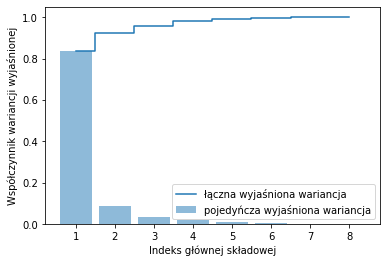

In [8]:
total = sum(eigen_vals) #suma wartości własnych
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)] #współczynnik wariancji wyjaśnionej
cum_var_exp = np.cumsum(var_exp) #funkcja numpy - cumsum, do wyliczenia sumy wyjasnionych wariancji 

import matplotlib.pyplot as plt 
plt.bar(range(1,9), var_exp, alpha=0.5, align='center', label='pojedyńcza wyjaśniona wariancja')
plt.step(range(1,9), cum_var_exp, where='mid', label='łączna wyjaśniona wariancja')
plt.ylabel('Współczynnik wariancji wyjaśnionej')
plt.xlabel('Indeks głównej składowej')
plt.legend(loc='best')
plt.show()

In [9]:
# Utworzenie liste krotek (tuples) par własnych i wektorów własnych
# Krotka - struktura danych, która przechowuje wiele wartości w jednej zmiennej
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sortowanie krotek (wartość własna, wektor własny) malejąco
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

eigen_pairs

[(6.681968240671245,
  array([-0.3728337 , -0.37405772, -0.33405991, -0.37925735, -0.36386031,
         -0.36932353, -0.37195827, -0.24186058])),
 (0.6993823065505866,
  array([-0.06104231, -0.03689013,  0.06610942, -0.14039184, -0.29764079,
         -0.17149868,  0.04368936,  0.92245435])),
 (0.29000079638197207,
  array([ 0.01130257,  0.00352797, -0.91976627,  0.18088887,  0.1770868 ,
          0.18566362,  0.15292737,  0.17874992])),
 (0.1684870357575117,
  array([-0.60890664, -0.5855834 ,  0.19109298,  0.2529372 ,  0.21105938,
          0.28817498,  0.23038476,  0.07185408])),
 (0.0828723369119228,
  array([ 0.03261604, -0.0342974 ,  0.03630402, -0.02356644,  0.338871  ,
          0.36518202, -0.83841836,  0.21154128])),
 (0.06132047754701098,
  array([-0.05138317, -0.0184662 ,  0.01270759,  0.11496015,  0.65989595,
         -0.73404611, -0.03409254,  0.09051408])),
 (0.01275073180435912,
  array([-0.69457808,  0.71712794, -0.00821758,  0.00615471, -0.00213494,
          0.03059091

In [10]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], #np.hstack układa tabele poziomo
               eigen_pairs[1][1][:, np.newaxis]))
print('Matryca W:\n', w)
#po egzekucji tego kodu otrzymujemy 13x2-wymiarową projekcję matrycy W z dwóch największych wektorów własnych

Matryca W:
 [[-0.3728337  -0.06104231]
 [-0.37405772 -0.03689013]
 [-0.33405991  0.06610942]
 [-0.37925735 -0.14039184]
 [-0.36386031 -0.29764079]
 [-0.36932353 -0.17149868]
 [-0.37195827  0.04368936]
 [-0.24186058  0.92245435]]


In [11]:
X_train_std[0].dot(w)

array([-0.45335137, -0.50341619])

In [12]:
X_train_pca = X_train_std.dot(w) #wykorzystanie iloczynu skalarnego macierzy
#X_train_pca

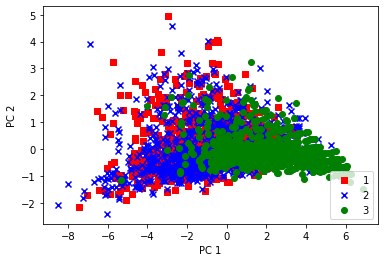

In [13]:
kolory = ['r', 'b', 'g']
znaczniki = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), kolory, znaczniki):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1') #główna składowa pierwsza
plt.ylabel('PC 2') #główna składowa druga
plt.legend(loc='lower right')
plt.show()

In [14]:
#etap 4

from sklearn.decomposition import PCA 

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_ #Współczynniki wariancji wyjaśnionej

array([8.34960281e-01, 8.73928797e-02, 3.62376979e-02, 2.10536742e-02,
       1.03554981e-02, 7.66243737e-03, 1.59329620e-03, 7.44235944e-04])

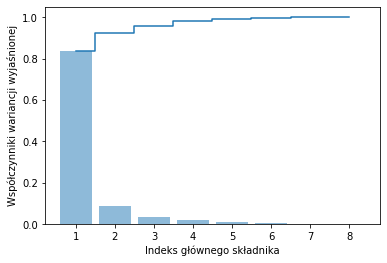

In [15]:
plt.bar(range(1, 9), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 9), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Współczynniki wariancji wyjaśnionej')
plt.xlabel('Indeks głównego składnika')

plt.show()

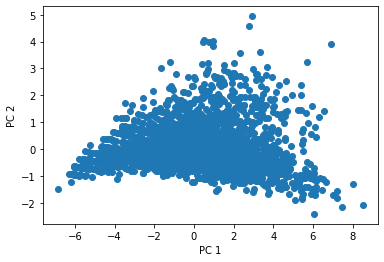

In [16]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [17]:
#sprawdzenie zestawu danych "Wine" poprzez klasyfikację przekształconych przykładów za pomocą algorytmu regresji logistycznej i wizualizację regionów decyzyjnych poprzez funkcję plot_decision_regions

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # konfiguracja znaczników i kolorów
    znaczniki = ('s', 'x', 'o')
    kolory = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(kolory[:len(np.unique(y))])

    # wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysowanie wykresu powierzchni decyzyjnej
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=znaczniki[idx], 
                    label=cl)

In [18]:
#estymator regresji logistycznej
from sklearn.linear_model import LogisticRegression  #estymator regresji logistycznej

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

#redukcja wymiarowości
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

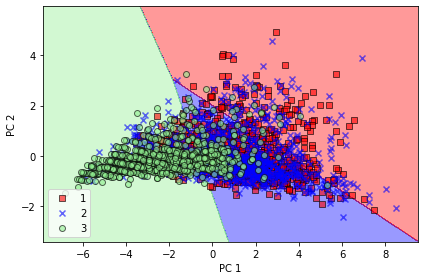

In [19]:
#dopasowanie modelu regresji logistycznej do zredukowanego zestawu danych
lr = lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [20]:
#Współczynniki wariancji wyjaśnionej dla różnych głównych składowych

pca = PCA(n_components=None) #ustawiamy n_components=None aby zostały zwrócone wszystkie główne składowe w uporządkowanej kolejności i unikamy w ten sposób redukcji wymiarowości
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([8.34960281e-01, 8.73928797e-02, 3.62376979e-02, 2.10536742e-02,
       1.03554981e-02, 7.66243737e-03, 1.59329620e-03, 7.44235944e-04])

In [21]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('Uśredniony Wektor  %s: %s\n' % (label, mean_vecs[label - 1]))

Uśredniony Wektor  1: [0.466  0.4807 0.4402 0.4494 0.3961 0.4586 0.4604 0.3722]

Uśredniony Wektor  2: [0.316  0.319  0.277  0.341  0.3408 0.3286 0.3168 0.2422]

Uśredniony Wektor  3: [-0.8139 -0.8316 -0.7442 -0.8261 -0.7739 -0.821  -0.8094 -0.6385]



In [22]:
d = 8 #liczba cech
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # macierz rozproszenia dla każdej klasy
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  #utworzenie kolumn wektorowych
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                               #sumowanie macierzy rozproszenia 

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 8x8


In [23]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [ 915 1069  939]


In [24]:
d = 8  #liczba cech
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Skalowana wewnątrzklasowa macierz rozproszenia: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Skalowana wewnątrzklasowa macierz rozproszenia: 8x8


In [25]:
mean_overall = np.mean(X_train_std, axis=0)
d = 8  #liczba cech
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # wektor kolumnowy
    mean_overall = mean_overall.reshape(d, 1)  #wektor kolumnowy
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Międzyklasowa macierz rozproszenia: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Międzyklasowa macierz rozproszenia: 8x8


In [26]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [27]:
# Listy krotek wektorów własnych i wartości własnych
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])for i in range(len(eigen_vals))]

# Sortowanie krotek od największej do najmniejszej
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Wartości własne w kolejności malejącej:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Wartości własne w kolejności malejącej:

576.3428271611284
11.054866570955072
1.5247661795096496e-11
3.0140396703237244e-12
1.9662155214250873e-12
1.1954951441993543e-12
1.071089725630941e-12
3.6400200259444034e-13


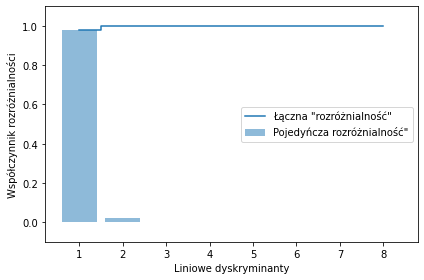

In [28]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 9), discr, alpha=0.5, align='center',
        label='Pojedyńcza rozróżnialność"')
plt.step(range(1, 9), cum_discr, where='mid',
         label='Łączna "rozróżnialność"')
plt.ylabel('Współczynnik rozróżnialności')
plt.xlabel('Liniowe dyskryminanty')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [29]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Macierz W:\n', w)

Macierz W:
 [[ 0.4239 -0.1256]
 [-0.681   0.4208]
 [-0.108   0.0861]
 [-0.3261  0.1707]
 [ 0.1334 -0.8315]
 [-0.3553  0.2281]
 [ 0.2003  0.1014]
 [-0.2331 -0.1298]]


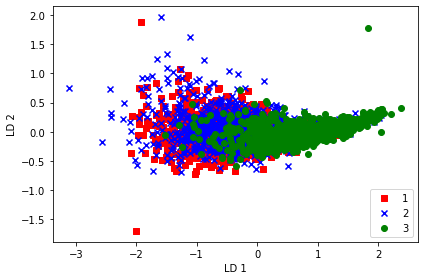

In [30]:
X_train_lda = X_train_std.dot(w)
kolory = ['r', 'b', 'g']
znaczniki = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), kolory, znaczniki):
    plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1] * (-1), c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

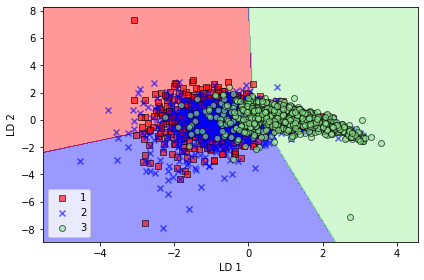

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

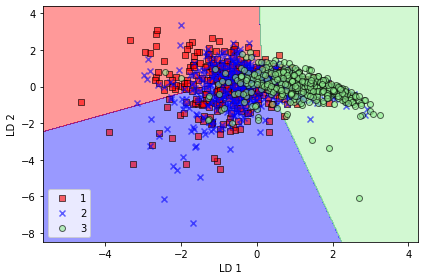

In [33]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [34]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score #ocena skuteczności modelu
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring 
        self.estimator = clone(estimator)
        self.k_features = k_features #pożądane cechy, które mają zostać wzrócone
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        #ocenianie podzbiorów cech, a następnie redukowane do momentu osiągniecia pożądanej wymiarowości 
        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])  
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

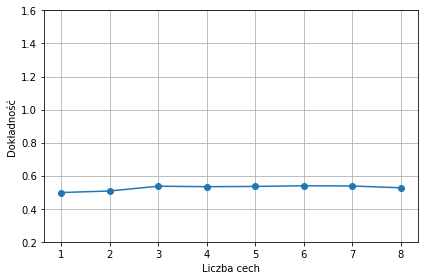

'\nWykres przedstawia wpływ liczby cech na dokładność klasyfikatora.\nKlasyfikator osiągnął 100-procentową dokładność dla wartości k = [3,7,8,9,10,11,12].\n'

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# wybieranie cech
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# tworzymy wykres podzbiorów cech
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.2, 1.60])
plt.ylabel('Dokładność')
plt.xlabel('Liczba cech')
plt.grid()
plt.tight_layout()
plt.show()

"""
Wykres przedstawia wpływ liczby cech na dokładność klasyfikatora.
Klasyfikator osiągnął 100-procentową dokładność dla wartości k = [3,7,8,9,10,11,12].
"""

In [36]:
#sprawdzenie jak wygląda najmniejszy podzbiór cech (k=3), który gwarantuje dobrą skuteczność analizy 
k3 = list(sbs.subsets_[7])
print(df_wino.columns[1:][k3])
"""
Za pomocą powyższego kodu odczytaliśmy indeksy kolumn trójelementowego podzbioru cech z jedenstej pozycji atrybutu sbs.subsets_
Po czym wyświetliśmy odpowiadające tym indeksom nazwy cech umieszczone w zbiorze danych df_wine
"""


Index(['Rings'], dtype='object')


'\nZa pomocą powyższego kodu odczytaliśmy indeksy kolumn trójelementowego podzbioru cech z jedenstej pozycji atrybutu sbs.subsets_\nPo czym wyświetliśmy odpowiadające tym indeksom nazwy cech umieszczone w zbiorze danych df_wine\n'

In [37]:
#sprawdzenie dokładności dla pierwotnego zestawu testowego:
knn.fit(X_train_std, y_train)
print('Dokładność dla danych uczących:', knn.score(X_train_std, y_train))
print('Dokładność dla danych testowych:', knn.score(X_test_std, y_test))

Dokładność dla danych uczących: 0.681491618200479
Dokładność dla danych testowych: 0.5231259968102073


In [38]:
#sprawdzenie dokładności dla trójelementowego podzbioru cech
knn.fit(X_train_std[:, k3], y_train)
print('Dokładność dla danych uczących:', knn.score(X_train_std[:, k3], y_train))
print('Dokładność dla danych testowych:', knn.score(X_test_std[:, k3], y_test))

Dokładność dla danych uczących: 0.4769072870338693
Dokładność dla danych testowych: 0.44417862838915473


 1) Whole weight                   0.170024
 2) Viscera weight                 0.168234
 3) Shell weight                   0.142651
 4) Shucked weight                 0.133711
 5) Diameter                       0.102113
 6) Length                         0.100151
 7) Height                         0.094346
 8) Rings                          0.088769


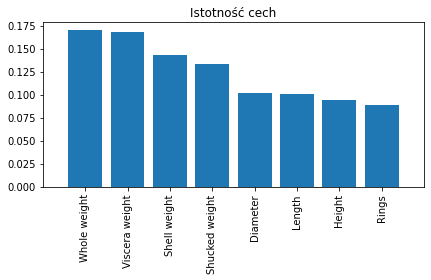

In [39]:
'''
Technika losowego losu - mierzenie ważności/istotności cechy
'''
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wino.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_ #istotność cech

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Istotność cech')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [40]:
#dobieranie cech na podstawie wartości progowej wyznaczonej przez użytkownika
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Liczba cech spełniających dane kryterium progowe:', X_selected.shape[1])
for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Liczba cech spełniających dane kryterium progowe: 6
 1) Whole weight                   0.170024
 2) Viscera weight                 0.168234
 3) Shell weight                   0.142651
 4) Shucked weight                 0.133711
 5) Diameter                       0.102113
 6) Length                         0.100151
